Number of image files: 10
Number of json files: 10


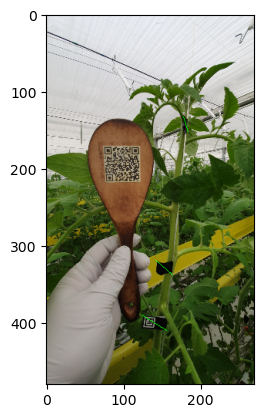

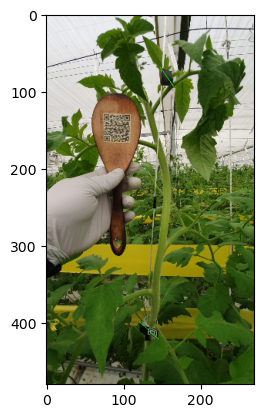

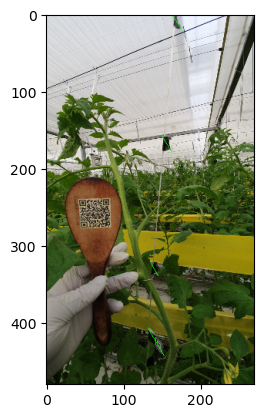

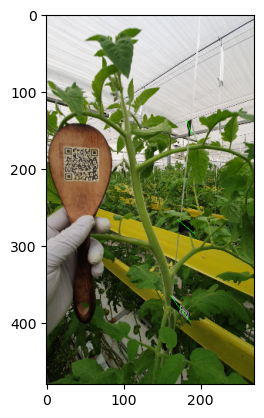

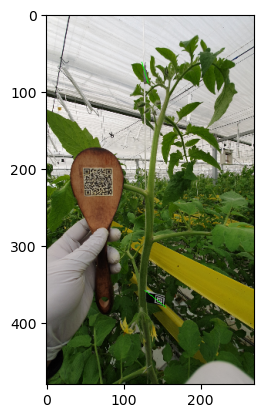

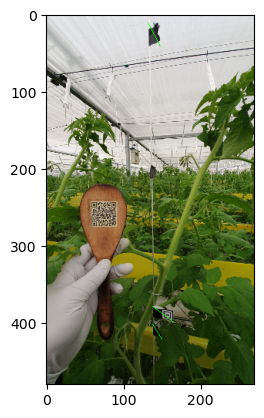

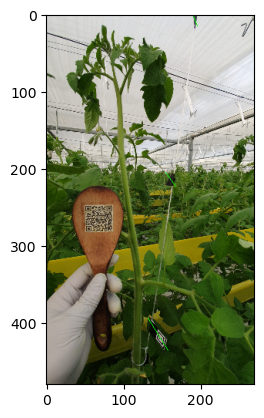

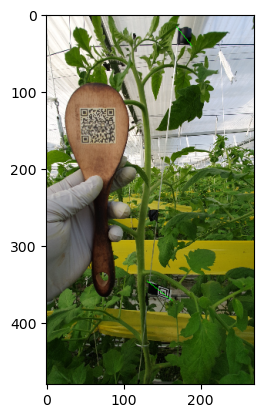

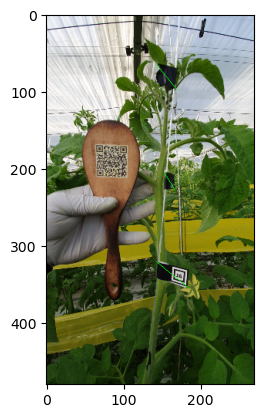

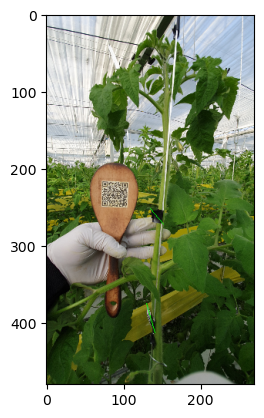

In [1]:
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image, ImageOps
from PIL.ExifTags import TAGS, GPSTAGS


def handle_image_rotation(img):
    try:
        image_exif = img._getexif()
        image_orientation = image_exif[274]
        if image_orientation in (2, '2'):
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (3, '3'):
            return img.transpose(Image.ROTATE_180)
        elif image_orientation in (4, '4'):
            return img.transpose(Image.FLIP_TOP_BOTTOM)
        elif image_orientation in (5, '5'):
            return img.transpose(Image.ROTATE_270).transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (6, '6'):
            return img.transpose(Image.ROTATE_270)
        elif image_orientation in (7, '7'):
            return img.transpose(Image.ROTATE_90).transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (8, '8'):
            return img.transpose(Image.ROTATE_90)
        else:
            return img
    except (AttributeError, KeyError, IndexError):
        # cases: image don't have getexif
        return img

new_size = (270, 480)  # 변경할 이미지 크기
img_directory = 'E:\\tomato_label\\097.지능형_스마트팜_통합_데이터(토마토)\\01.데이터\\1.Training\\원천데이터\\a2.화방높이'
json_directory = 'E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/라벨링데이터/a2.화방높이'

image_files = [os.path.join(img_directory, file) for file in os.listdir(img_directory) if file.endswith('.png')][:10]
json_files = [os.path.join(json_directory, file.replace('.png', '.json')) for file in os.listdir(img_directory) if file.endswith('.png')][:10]

print(f"Number of image files: {len(image_files)}")
print(f"Number of json files: {len(json_files)}")

for image_file, json_file in zip(image_files, json_files):
    image = Image.open(image_file)

    # Handle image orientation
    image = handle_image_rotation(image)

    image = np.array(image)

    if image is None:
        print(f"Cannot load image: {image_file}")
        continue

    with open(json_file, 'r') as f:
        data = json.load(f)

    original_size = (data['imageWidth'], data['imageHeight'])

    image = cv2.resize(image, new_size)

    shapes = data['shapes']

    for shape in shapes:
        points = np.array(shape['points'], dtype=np.float32)
        points[:, 0] *= new_size[1] / original_size[1]  # 너비 조정
        points[:, 1] *= new_size[0] / original_size[0]  # 높이 조정
        points = points.astype(np.int32)

        cv2.fillPoly(image, [points.reshape((-1, 1, 2))], color=(0, 255, 0))

    # Show image with matplotlib
    plt.imshow(image)
    plt.show()

    new_image_path = os.path.join("E:/Unet/만개꽃/", os.path.split(image_file)[1])

    img_pil = Image.fromarray(image)
    img_pil.save(new_image_path)


In [ ]:
import cv2
import json
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

def handle_image_rotation(img):
    try:
        image_exif = img._getexif()
        image_orientation = image_exif[274]
        if image_orientation in (2, '2'):
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (3, '3'):
            return img.transpose(Image.ROTATE_180)
        elif image_orientation in (4, '4'):
            return img.transpose(Image.FLIP_TOP_BOTTOM)
        elif image_orientation in (5, '5'):
            return img.transpose(Image.ROTATE_270).transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (6, '6'):
            return img.transpose(Image.ROTATE_270)
        elif image_orientation in (7, '7'):
            return img.transpose(Image.ROTATE_90).transpose(Image.FLIP_LEFT_RIGHT)
        elif image_orientation in (8, '8'):
            return img.transpose(Image.ROTATE_90)
        else:
            return img
    except (AttributeError, KeyError, IndexError):
        # cases: image don't have getexif
        return img

new_size = (272, 480)  # 변경할 이미지 크기

img_directory = 'E:\\tomato_label\\097.지능형_스마트팜_통합_데이터(토마토)\\01.데이터\\1.Training\\원천데이터\\d1.꽃(개화군)'
json_directory = 'E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/라벨링데이터/d1.꽃(개화군)'

resized_image_directory = 'E:\\Unet\\개화군(꽃)_축소이미지'
resized_json_directory = 'E:\\Unet\\개화군(꽃)_축소JSON'

os.makedirs(resized_image_directory, exist_ok=True)
os.makedirs(resized_json_directory, exist_ok=True)

image_files = [os.path.join(img_directory, file) for file in os.listdir(img_directory) if file.endswith('.png')]
json_files = [os.path.join(json_directory, file.replace('.png', '.json')) for file in os.listdir(img_directory) if file.endswith('.png')]

print(f"Number of image files: {len(image_files)}")
print(f"Number of json files: {len(json_files)}")

for image_file, json_file in zip(image_files, json_files):
    # 이미지 불러오기
    image = Image.open(image_file)
    image = handle_image_rotation(image)  # 이미지 회전 처리
    original_size = (image.width, image.height)

    # 이미지 크기 변경
    image = image.resize(new_size)
    resized_image = np.array(image)

    if resized_image is None:
        print(f"Cannot load image: {image_file}")
        continue

    # JSON 데이터 불러오기
    with open(json_file, 'r') as f:
        data = json.load(f)

    # JSON 데이터 내 좌표 조정
    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.float32)
        points[:, 0] *= new_size[0] / original_size[0]  # 너비 조정
        points[:, 1] *= new_size[1] / original_size[1]  # 높이 조정
        shape['points'] = points.tolist()

    # 변경된 이미지 크기 JSON 데이터에 반영
    data['imageWidth'], data['imageHeight'] = new_size

    # 파일명
    base_name = os.path.basename(image_file).replace('.png', '')

    # 이미지 저장
    new_image_path = os.path.join(resized_image_directory, base_name + '_resized.png')
    img_pil = Image.fromarray(resized_image)
    img_pil.save(new_image_path)

    # JSON 데이터 저장
    new_json_path = os.path.join(resized_json_directory, base_name + '_resized.json')
    with open(new_json_path, 'w') as f:
        json.dump(data, f)
